# **Rice Image Classification**

Dataset = Rice Image Dataset ([Source](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset))

## 1. Library Import

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import kaggle
import zipfile
import pathlib
import numpy as np
from PIL import Image

## Data Preparation

### Data Loading

In [5]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0




  0%|          | 0.00/219M [00:00<?, ?B/s]
  0%|          | 1.00M/219M [00:01<04:25, 862kB/s]
  1%|          | 2.00M/219M [00:01<02:10, 1.75MB/s]
  1%|1         | 3.00M/219M [00:01<01:20, 2.80MB/s]
  2%|2         | 5.00M/219M [00:01<00:43, 5.20MB/s]
  3%|3         | 7.00M/219M [00:01<00:29, 7.65MB/s]
  4%|4         | 9.00M/219M [00:01<00:22, 9.69MB/s]
  5%|5         | 11.0M/219M [00:02<00:19, 11.1MB/s]
  6%|5         | 13.0M/219M [00:02<00:17, 12.2MB/s]
  7%|6         | 15.0M/219M [00:02<00:15, 13.6MB/s]
  8%|7         | 17.0M/219M [00:02<00:14, 14.5MB/s]
  9%|8         | 19.0M/219M [00:02<00:14, 14.8MB/s]
 10%|9         | 21.0M/219M [00:02<00:13, 15.4MB/s]
 10%|#         | 23.0M/219M [00:02<00:13, 15.1MB/s]
 11%|#1        | 25.0M/219M [00:02<00:12, 15.8MB/s]
 12%|#2        | 27.0M/219M [00:03<00:12, 15.7MB/s]
 13%|#3        | 29.0M/219M [00:03<00:12, 16.5MB/s]
 14%|#4        | 31.0M/219M [00:03<00:11, 17.0MB/s]
 15%|#5        | 33.0M/219M [00:03<00:11, 17.5MB/s]
 16%|#5        | 35.0

In [7]:
with zipfile.ZipFile("rice-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
data_dir = './Rice_Image_Dataset'
arborio_dir = os.path.join(data_dir, 'Arborio')
basmati_dir = os.path.join(data_dir, 'Basmati')
ipsala_dir = os.path.join(data_dir, 'Ipsala')
jasmine_dir = os.path.join(data_dir, 'Jasmine')
karacadag_dir = os.path.join(data_dir, 'Karacadag')

print(f"There are {len(os.listdir(arborio_dir))} images of arborio.")
print(f"There are {len(os.listdir(basmati_dir))} images of basmati.")
print(f"There are {len(os.listdir(ipsala_dir))} images of ipsala.")
print(f"There are {len(os.listdir(jasmine_dir))} images of jasmine.")
print(f"There are {len(os.listdir(karacadag_dir))} images of karacadag.")

There are 15000 images of arborio.
There are 15000 images of basmati.
There are 15000 images of ipsala.
There are 15000 images of jasmine.
There are 15000 images of karacadag.


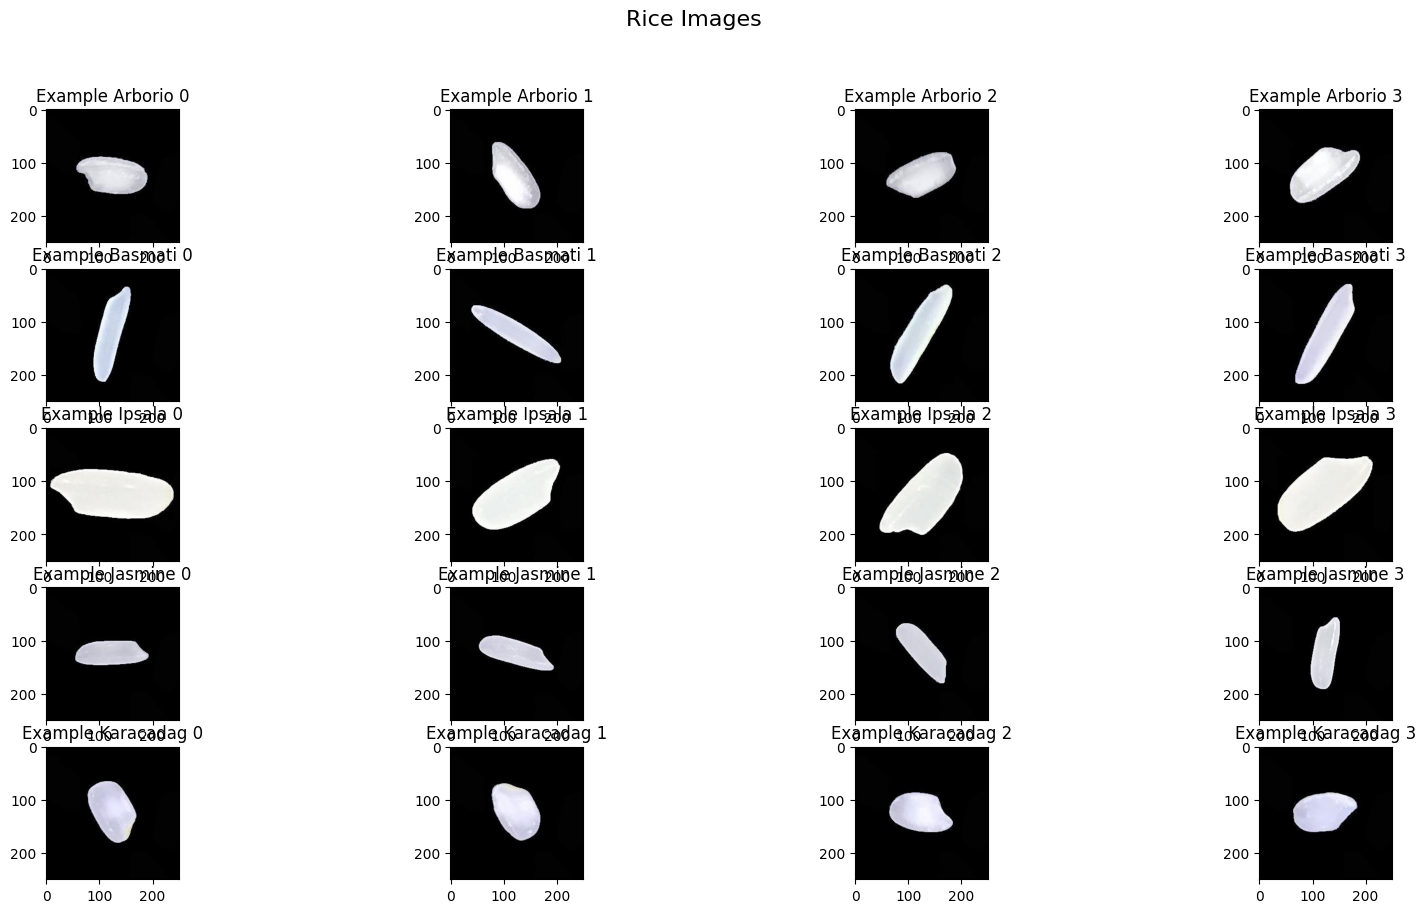

In [3]:
arborio_filenames = [os.path.join(arborio_dir, filename) for filename in os.listdir(arborio_dir)]
basmati_filenames = [os.path.join(basmati_dir, filename) for filename in os.listdir(basmati_dir)]
ipsala_filenames = [os.path.join(ipsala_dir, filename) for filename in os.listdir(ipsala_dir)]
jasmine_filenames = [os.path.join(jasmine_dir, filename) for filename in os.listdir(jasmine_dir)]
karacadag_filenames = [os.path.join(karacadag_dir, filename) for filename in os.listdir(karacadag_dir)]

fig, axes = plt.subplots(5, 4, figsize=(20, 10))
fig.suptitle('Rice Images', fontsize=16)

# Plot the first 4 images of each class
for i, arborio_image in enumerate(arborio_filenames[:4]):
    img = tf.keras.utils.load_img(arborio_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example Arborio {i}')

for i, basmati_image in enumerate(basmati_filenames[:4]):
    img = tf.keras.utils.load_img(basmati_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example Basmati {i}')

for i, ipsala_image in enumerate(ipsala_filenames[:4]):
    img = tf.keras.utils.load_img(ipsala_image)
    axes[2, i].imshow(img)
    axes[2, i].set_title(f'Example Ipsala {i}')

for i, jasmine_image in enumerate(jasmine_filenames[:4]):
    img = tf.keras.utils.load_img(jasmine_image)
    axes[3, i].imshow(img)
    axes[3, i].set_title(f'Example Jasmine {i}')

for i, karacadag_image in enumerate(karacadag_filenames[:4]):
    img = tf.keras.utils.load_img(karacadag_image)
    axes[4, i].imshow(img)
    axes[4, i].set_title(f'Example Karacadag {i}')

plt.show()

### Data Preprocessing

#### Split Dataset

In [4]:
def train_val_split():
    training_data, validation_data = tf.keras.utils.image_dataset_from_directory(
        directory= data_dir,
        image_size=(150,150),
        batch_size= 128,
        label_mode= 'categorical',
        validation_split= 0.2,
        subset= 'both',
        seed= 42
    )

    return training_data, validation_data

In [5]:
training_data, validation_data = train_val_split()

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Using 15000 files for validation.


In [6]:
def create_augmentation():
    augmentation_model= tf.keras.Sequential([
        tf.keras.layers.Input(shape=(150,150,3)),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
        tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
        tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest')
    ])

    return augmentation_model

## Modelling

In [7]:
class EarlyStopCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.95 and logs['val_accuracy'] >= 0.95:
            self.model.stop_training = True
            print("\nReached 95% Train Accuracy and 95% Validation Accuracy, Model Stop!")

In [8]:
def create_model():
    augmentation_images = create_augmentation()
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(150,150,3)),
        augmentation_images,
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

## Evaluation and Visualization

In [9]:
model = create_model()
history= model.fit(
    training_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[EarlyStopCallbacks()]
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 294ms/step - accuracy: 0.6433 - loss: 0.8231 - val_accuracy: 0.6914 - val_loss: 1.0224
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 284ms/step - accuracy: 0.9599 - loss: 0.1115 - val_accuracy: 0.7240 - val_loss: 1.1027
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 275ms/step - accuracy: 0.9749 - loss: 0.0746 - val_accuracy: 0.6719 - val_loss: 1.5342
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 121s 257ms/step - accuracy: 0.9839 - loss: 0.0470 - val_accuracy: 0.8832 - val_loss: 0.3428
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 122s 260ms/step - accuracy: 0.9502 - loss: 0.1765 - val_accuracy: 0.7656 - val_loss: 0.8014
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 262ms/step - accuracy: 0.9869 - loss: 0.0398 - val_accuracy: 0.7518 - val_loss: 0.9394
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 262ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.7765 - val_loss: 0.8022
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 264ms/step - accuracy: 0.9911 -

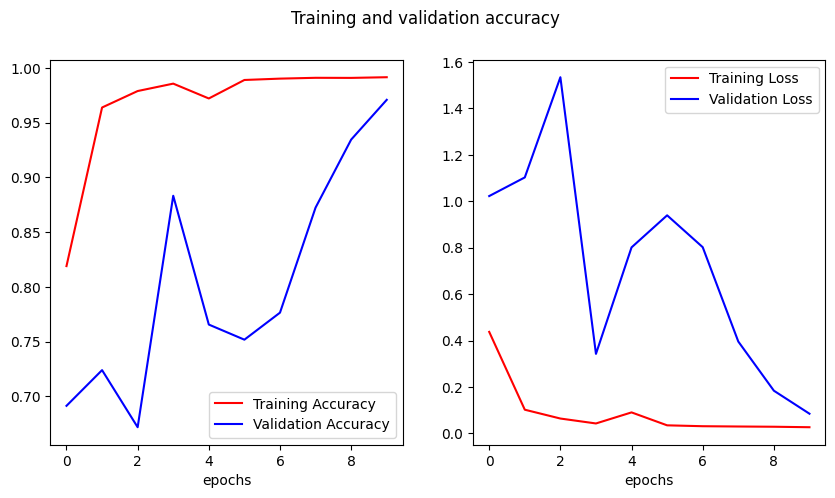

In [10]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

## Model Conversion

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("model.tflite")
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\fikri\AppData\Local\Temp\tmpjhbybd7c\assets


INFO:tensorflow:Assets written to: C:\Users\fikri\AppData\Local\Temp\tmpjhbybd7c\assets


Saved artifact at 'C:\Users\fikri\AppData\Local\Temp\tmpjhbybd7c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_731')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1522132422672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132424208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132423632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132424976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132424400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132425744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132425168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132426512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132425936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1522132427280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1

26109104